In [1]:
classifiers=['RF50','RF30','RF20','RF15','RF10','SVM']

prfDat_a, sprfDat_a, prfDat_t, sprfDat_t = [], [], [], []

for i in range(len(classifiers)):
    prfDat_a.append([])
    sprfDat_a.append([])
    prfDat_t.append([[], []])
    sprfDat_t.append([[], []])
    
for i in range(len(classifiers)):
    for line in open(classifiers[i]+'_stat_.prf.txt','r').readlines():
        temp=line.split()
        prfDat_a[i].append(float(temp[2]))
        prfDat_t[i][0].append(float(temp[0]))
        prfDat_t[i][1].append(float(temp[1]))
    for line in open(classifiers[i]+'_stat_.sprf.txt','r').readlines():
        temp=line.split()
        sprfDat_a[i].append(float(line.split()[2]))
        sprfDat_t[i][0].append(float(line.split()[0]))
        sprfDat_t[i][1].append(float(line.split()[1]))
        
utils=open('utils.txt','r').readlines()
for i in range(len(utils)):
    utils[i]=(utils[i])[0:len(utils[i])-1]
print (utils)

index=[]
for i in range(len(prfDat_a[0])):
    index.append(int(i*1.8*len(utils)))

col_raw=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
col=col_raw[0:len(classifiers)-1]
col.append('black')

['sha224', 'cat', 'gzip', 'rm']


In [12]:
import numpy as np
import matplotlib.pyplot as plt

command=open('utils.txt','r').readlines()
sampleNum=[];
for i in range(443):                       #443 is the number of groups in this case
    sampleNum.append((i+1)*6*len(command)) #'6' is the number of samples for each command in each group
                                           #'len(command)' is the number of command involved

class clfPerformance(object):
    __slots__=['filename_','IN_']
    def __init__(self,filename):
        self.filename_=filename
        self.IN_=open(self.filename_,'r').readlines()
        
    def getList(self,real='',predict=''):
        test_=[]
        for i in range(len(command)**2):
            temp=[]
            for line in self.IN_:
                temp.append(int(line.split()[i]))
            test_.append(temp)
        return test_[command.index(real)*len(command)+command.index(predict)]
    
    def showOne(self,real='',predict='',label='',color='black'):
        plt.plot(sampleNum,self.getList(real,predict)/(sampleNum/np.repeat(len(command),443)),label=label,color=color)
    
    def showOneSet(self,real=''):
        for predict in command:
            if real!=predict:
                plt.plot(sampleNum,self.getList(real,predict)/(sampleNum/np.repeat(len(command),443)),label=predict)
        plt.title('\''+real+'\' being wrongly classified as other command')
        plt.xlabel('total sample size')
        plt.ylabel('false \'True\' rate as')
        plt.ylim(-0.2,1.2)
        plt.legend()
    
    def showTruePositive(self,align=True,colors=['red','blue','gray','violet','green','yellow','pink','orange']):
        temp=[]
        #Getting nominators for each command
        for lines in self.IN_:
            Input=np.cast[int](lines.split()).reshape((len(command),len(command)))
            for i in range(len(command)):
                temp.append(Input[i,i]/(0.1+sum(Input[:,i])))
                
        temp=np.reshape(temp,(443,len(command)))#each column stores one command
        
        #normalization and plotting
        for i,name,col in zip(range(len(command)),command,colors[0:len(command)]):
            plt.plot(sampleNum,temp[:,i],label=name,color=col)    
            
        plt.title('True positive rate for different commands')
        plt.xlabel('total sample size')
        plt.ylabel('Positive/Presence')
        if align==True:
            plt.ylim(-0.2,1.2)
        plt.legend()
    
    def showError(self,align=True,colors=['red','blue','gray','violet','green','yellow','pink','orange']):
        temp=[]
        #Getting nominators for each command
        for lines in self.IN_:
            Input=np.cast[int](lines.split()).reshape((len(command),len(command)))
            for i in range(len(command)):
                rowSum=sum(Input[i,:])
                columnSum=sum(Input[:,i])
                temp.append(rowSum+columnSum-2*Input[i,i])
                
                
        
        temp=np.reshape(temp,(443,len(command)))#each column stores one command
        
        #normalization and plotting
        for i,name,col in zip(range(len(command)),command,colors[0:len(command)]):
            plt.plot(sampleNum,temp[:,i]/sampleNum,label=name,color=col)    
            
        plt.title('Error rate for Classification')
        plt.xlabel('total sample size')
        plt.ylabel('(FP+FN)/total')
        if align==True:
            plt.ylim(-0.2,1.2)
        plt.legend()
        
    def showAcc(self,align=True,colors=['red','blue','gray','violet','green','yellow','pink','orange']):
        temp=[]
        #Getting nominators for each command
        for lines in self.IN_:
            Input=np.cast[int](lines.split()).reshape((len(command),len(command)))
            for i in range(len(command)):
                rowSum=sum(Input[i,:])
                columnSum=sum(Input[:,i])
                temp.append(rowSum+columnSum-2*Input[i,i])
        temp=np.reshape(temp,(443,len(command)))#each column stores one command
        
        #normalization and plotting
        for i,name,col in zip(range(len(command)),command,colors[0:len(command)]):
            plt.plot(sampleNum,np.repeat(1,443)-(temp[:,i]/sampleNum),label=name,color=col)    
            
        plt.title('Accuracy rate for Classification')
        plt.xlabel('total sample size')
        plt.ylabel('(TP+TN)/total')
        if align==True:
            plt.ylim(-0.2,1.2)
        plt.legend()
        
    def showTrueNegative(self,align=True,colors=['red','blue','gray','violet','green','yellow','pink','orange']):
        temp=[]
        for lines in self.IN_:
            Input=np.cast[float](lines.split()).reshape((len(command),len(command)))
            for i in range(len(command)):
                neg_label = np.sum(Input)-np.sum(Input[:,i])+0.1
                neg_true  = np.sum(Input)-np.sum(Input[:,i])-np.sum(Input[i,:])+Input[i,i]
                temp.append(neg_true/neg_label)
        temp=np.reshape(temp,(443,len(command)))
        for i, name, col in zip(range(len(command)),command,colors[0:len(command)]):
            plt.plot(sampleNum,temp[:,i],label=name,color=col)
        plt.title('Precision score for different commands')
        plt.xlabel('total sample size')
        plt.ylabel('(Pred F)U(Label F)/Pred F')
        if align==True:
            plt.ylim(-0.2,1.2)
        plt.legend()
        
    
        
    def showPrecision (self,align=True,colors=['red','blue','gray','violet','green','yellow','pink','orange']):
        temp=[]
        for lines in self.IN_:
            Input=np.cast[float](lines.split()).reshape((len(command),len(command)))
            for i in range(len(command)):
                temp.append(Input[i,i]/np.sum(Input[i,:]))
        temp=np.reshape(temp,(443,len(command)))
        for i, name, col in zip(range(len(command)),command,colors[0:len(command)]):
            plt.plot(sampleNum,temp[:,i],label=name,color=col)
        plt.title('Precision score for different commands')
        plt.xlabel('total sample size')
        plt.ylabel('TP/(TP+FP)')
        if align==True:
            plt.ylim(-0.2,1.2)
        plt.legend()

        

In [3]:
RF20SSSS=clfPerformance('RF20_cfm_.sprf.txt')

In [14]:
SVM111=clfPerformance('SVM_cfm_.sprf.txt')

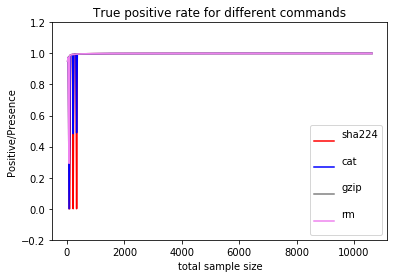

In [8]:
SVM111.showTruePositive()

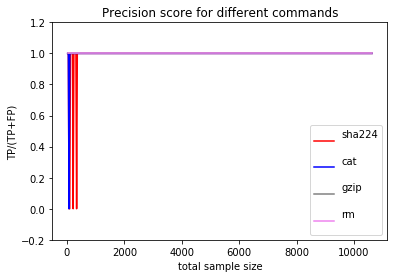

In [5]:
SVM111.showPrecision()

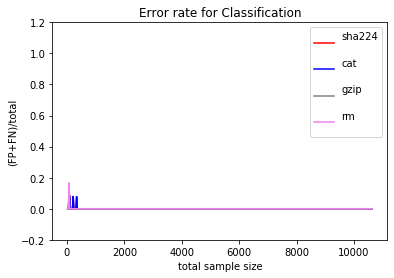

In [6]:
SVM111.showError()

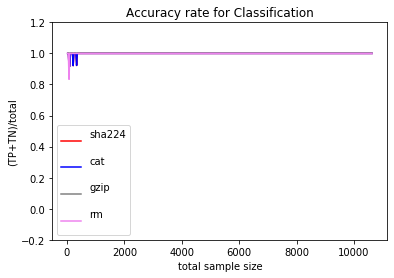

In [7]:
SVM111.showAcc()

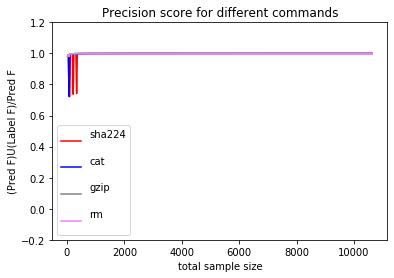

In [15]:
SVM111.showTrueNegative()